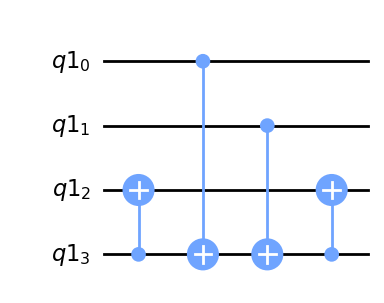

In [2]:
from qiskit import QuantumCircuit, QuantumRegister
import numpy as np

# load a dummy circuit
# generate network of random cnots
n, M = 2, 4
N = n**2
register = QuantumRegister(N)
qc = QuantumCircuit(register)

for _ in range(M):
    qc.cx(*np.random.choice(N, 2, replace=False))
qc.name = "random cx circuit"
qc.decompose().draw("mpl")